In [1]:
from imp import reload

import numpy as np
import pandas as pd
import sys,math
import sistercellclass as scc; reload(scc)
import os

import matplotlib.pyplot as plt
%matplotlib notebook
# %matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]


In [2]:
datadir   = '/home/lukas/projects/sistercells/experiments/SISTERS-NONSISTERS/SISTERS/'
datafiles = [os.path.join(datadir,fn) for fn in os.listdir(datadir) if os.path.splitext(fn)[1][1:].upper() == 'XLS']

#datafiles = ['/home/lukas/projects/sistercells/experiments/SISTERS-NONSISTERS/SISTERS/072818POS9_ch2t_sis2.xls']

data      = scc.SisterCellData(infiles = datafiles, debugmode = False)

In [ ]:

for dataID,filename,x in data:
    #print dataID,filename
    cdivA,cdivB = data.CellDivisionTrajectory(dataID)
    #print np.array(cdivA['generationtimeA']),np.array(cdivB['generationtimeB'])
    if dataID == 0:
        gentime = np.concatenate([np.array(cdivA['generationtimeA']),np.array(cdivB['generationtimeB'])])
    else:
        gentime = np.concatenate([gentime,np.array(cdivA['generationtimeA']),np.array(cdivB['generationtimeB'])])
    #print

#np.savetxt('tmp.txt',gentime)
#plt.hist(gentime,range=(0,2),bins=40,log=True)
#print gentime
#print max(gentime)
#gth = dict()
#for x in np.arange(0,2.1,.05):
#    gth['{:.2f}'.format(x)] = 0
#for g in gentime:
#    gth['{:.2f}'.format(g)] += 1

#print gth


In [3]:
def autocorrelation (x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x)
    f = np.fft.fft(xp)
    p = np.array([np.real(v)**2+np.imag(v)**2 for v in f])
    pi = np.fft.ifft(p)
    return np.real(pi)[:x.size/2]/np.sum(xp**2)

growth_length
length_birth
generationtime
length_final


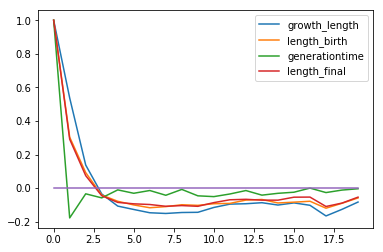

In [6]:
acf = dict()
for dataID,filename,x in data:
    a,b = data.CellDivisionTrajectory(dataID)
    for k in [kk for kk in a.keys() if kk[:4]!='time']:
        if not k[:-1] in acf.keys():
            acf[k[:-1]] = list()
        if len(a[k]) > 0:
            tmpacf = autocorrelation(a[k])
            if not np.isnan(tmpacf).any():
                acf[k[:-1]].append(tmpacf)
        if len(b[k[:-1]+'B']) > 0:
            tmpacf = autocorrelation(b[k[:-1] + 'B'])
            if not np.isnan(tmpacf).any():
                acf[k[:-1]].append(tmpacf)

acf_avg = dict()
for k in acf.keys():
    maxl  = np.max([len(a) for a in acf[k]])
    count = np.zeros(maxl)
    acf_avg[k] = np.zeros(maxl)
    for a in acf[k]:
        acf_avg[k][:len(a)] += a
        count[:len(a)] += 1.
    acf_avg[k] /= count
    print k
    #print acf_avg[k]
    plt.plot(np.arange(20),acf_avg[k][:20],label = k)
plt.plot(np.arange(20),np.zeros(20))
plt.legend()